Basic ML (1 real input and 1 real output) - Polinomial regression + Regularization

In [217]:
import numpy as np # numerical things
import numpy.matlib as nml # matricial computations
import matplotlib.pyplot as plt # plots

In [218]:
# fixing the seed of the random allows us to obtain the same results
np.random.seed(13) # usually better to use a prime number

In [219]:
# oracle = function (math) /system (ML) that I want to aproximate (in this case a parabola)
def oracle(x):
  return x**2 # I suppose x can be [0,1]

In [220]:
# Sample some data from the oracle
n = 30 # number of samples of the dataset
sigma = 0.02 # sigma = power of the noise; std gaussian noise (I want my measurement to be realistic)
             # reducing it, the point will be more concentrated around the oracle
nt = 1000 # numer of data we use for test (to see what we actually learnt from the data);
          # used to estimate the true error L(f) of the model (not pox in real life bc we do not have the system, here we have the oracle)

In [221]:
# Collect our dataset
x = np.random.rand(n) # randomly sample; x equally distributed in [0,1]
y = oracle(x) + sigma * np.random.randn(n) # y is corrupted by a random (Gaussian) noise; corrupts my ability to measure the obstacle

In [222]:
# Fot the test
xt = np.linspace(0,1,nt)
yt = oracle(xt) # not pox in real life (we do not know our system), we can do it because we have the oracle

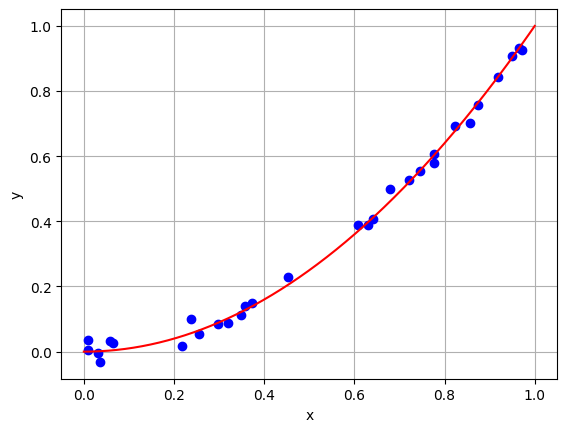

In [223]:
fig, ax = plt.subplots()
ax.plot(x,y, 'bo') # blue points
ax.plot(xt,yt, 'r') # red line
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid() # acrivate the grid
plt.show()

Polinomial regression (MSE)

In [224]:
p = 2 # degree of the polynome I want to fit on my data
x = np.asmatrix(x).transpose() # x should become a column vector
y = np.asmatrix(y).transpose() # same for y
X = nml.ones((n,1)) # matrix X; column vector of 1
for i in range (1, p+1):
  X = np.concatenate((X,np.power(x,i)), axis=1) # column by column
# solve the following linear system: (X'* X) c = X'* y
c = np.linalg.solve(np.matmul(np.transpose(X),X), np.matmul(np.transpose(X),y))

In [225]:
# I want to compute the quality of my model; I do this using the test set
xt = np.asmatrix(xt).transpose()
yt = np.asmatrix(yt).transpose()
Xt = nml.ones((nt,1))
for i in range (1, p+1):
  Xt = np.concatenate((Xt,np.power(xt,i)), axis=1)
yp = np.matmul(Xt,c)

In [226]:
err = np.mean(np.power(yt-yp,2))
print("err:", err)

err: 1.9041307488901314e-05


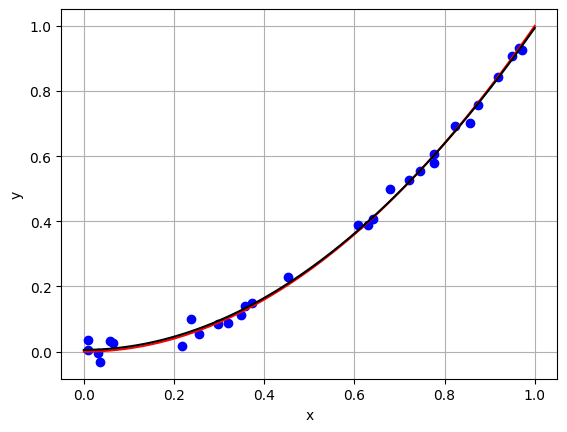

In [227]:
fig, ax = plt.subplots()
ax.plot(x,y, 'bo') # blue points
ax.plot(xt,yt, 'r') # red line for the model we created
ax.plot(xt,yp, 'k') # black line for what we actually have learnt
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid() # acrivate the grid
plt.show()

I can see that if I increase the value of p (ex: p = 10), the black line will follow more the data, but will be further form the oracle red line.


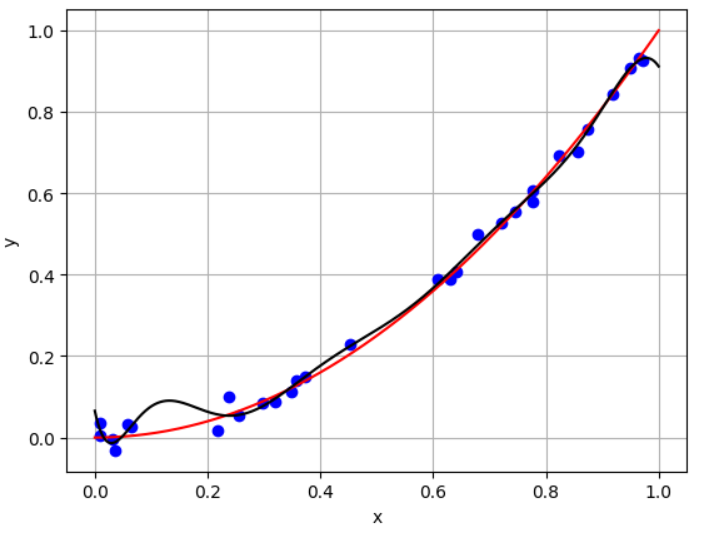

In [228]:
from IPython.display import Image, display
display(Image(filename="/content/Screenshot 2025-10-17 125719.png", width=450))

If also I mantain p = 10 and change the numer of point (ex: n = 12), my model has an even more strange behavior.

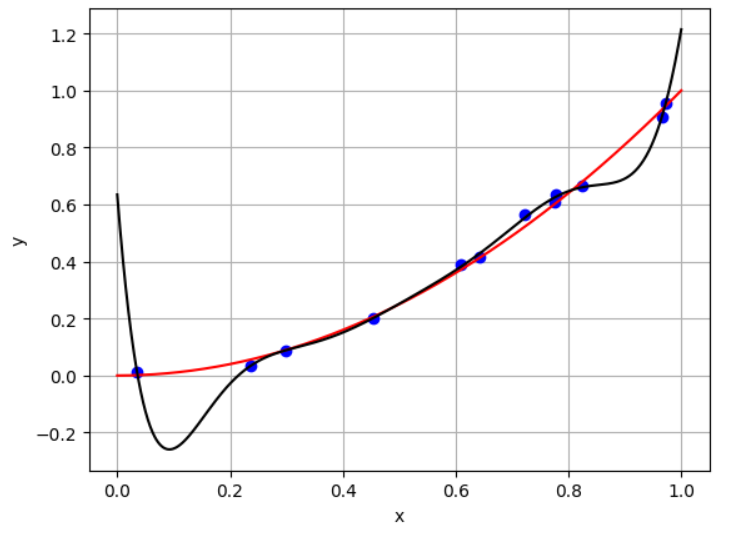

In [229]:
from IPython.display import Image, display
display(Image(filename="/content/Screenshot 2025-10-17 131015.png", width=450))